In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/car_evaluation.csv')

In [3]:
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
data.isnull().sum()

,0
vhigh,0
vhigh.1,0
2,0
2.1,0
small,0
low,0
unacc,0


In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = col_names


In [9]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [10]:
for i in data.columns:
  print(data[i].value_counts())
  print()

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64

maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64

doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64

persons
4       576
more    576
2       575
Name: count, dtype: int64

lug_boot
med      576
big      576
small    575
Name: count, dtype: int64

safety
med     576
high    576
low     575
Name: count, dtype: int64

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64



In [11]:
data['class'].value_counts()

,count
class,
unacc,1209
acc,384
good,69
vgood,65


In [15]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in data.columns:
  if data[i].dtypes == 'object':
    data[i] = enc.fit_transform(data[i].values.reshape(-1,1))

In [16]:
x = data.drop(['class'], axis=1)

y = data['class']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1157, 6)
(570, 6)
(1157,)
(570,)


In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
predictions = model.predict(x_test)
predictions

array([2., 2., 2., 0., 2., 0., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 2., 0., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 1.,
       2., 2., 1., 2., 2., 3., 0., 0., 2., 2., 1., 0., 2., 2., 2., 2., 2.,
       2., 0., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 3., 2., 2.,
       0., 2., 3., 0., 2., 2., 2., 0., 2., 2., 2., 2., 3., 2., 2., 0., 2.,
       0., 2., 2., 0., 0., 2., 1., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2.,
       2., 2., 2., 1., 0., 2., 2., 0., 2., 0., 2., 2., 0., 2., 2., 2., 2.,
       2., 2., 0., 2., 0., 0., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 0., 2., 0., 2., 0., 2., 2., 0., 2., 0., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 1., 2., 3., 0., 0., 2., 3.,
       0., 2., 1., 2., 0., 0., 3., 2., 0., 2., 0., 2., 2., 0., 1., 2., 2.,
       2., 2., 2., 2., 0., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 3.,
       2., 0., 2., 0., 2., 1., 2., 2., 0., 2., 2., 2., 2., 2., 2., 0., 3.,
       2., 2., 0., 0., 0.

In [22]:
# Evaluate the model

from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9789473684210527

[Text(0.5413851351351351, 0.9642857142857143, 'x[3] <= 0.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.5278716216216216, 0.8928571428571429, 'gini = 0.0\nsamples = 377\nvalue = [0, 0, 377, 0]'),
 Text(0.5548986486486487, 0.8928571428571429, 'x[5] <= 0.5\ngini = 0.576\nsamples = 780\nvalue = [257, 51, 433, 39]'),
 Text(0.27407094594594594, 0.8214285714285714, 'x[0] <= 2.5\ngini = 0.626\nsamples = 256\nvalue = [138, 19, 60, 39]'),
 Text(0.15625, 0.75, 'x[0] <= 0.5\ngini = 0.615\nsamples = 189\nvalue = [106, 19, 25, 39]'),
 Text(0.05405405405405406, 0.6785714285714286, 'x[1] <= 2.5\ngini = 0.404\nsamples = 64\nvalue = [46, 0, 18, 0]'),
 Text(0.04054054054054054, 0.6071428571428571, 'x[2] <= 0.5\ngini = 0.115\nsamples = 49\nvalue = [46, 0, 3, 0]'),
 Text(0.02702702702702703, 0.5357142857142857, 'x[3] <= 1.5\ngini = 0.32\nsamples = 15\nvalue = [12, 0, 3, 0]'),
 Text(0.013513513513513514, 0.4642857142857143, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0, 0]'),
 Text(0.0

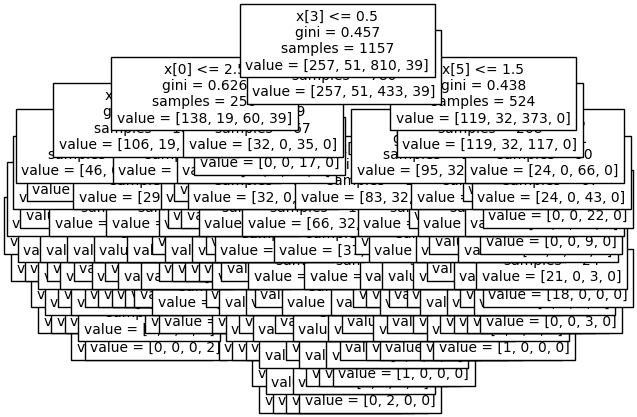

In [23]:
from sklearn import tree
tree.plot_tree(model, fontsize = 10)

In [24]:
import graphviz

In [25]:
y = y.astype(str)

In [27]:
class_names = y.unique()
dot_data = tree.export_graphviz(model, out_file=None, feature_names=x.columns, class_names=class_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Save the tree visualization as a PDF or PNG file
graph.view("decision_tree")    # Open the tree visualization using the default viewer

'decision_tree.pdf'